# Задание 1

In [110]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_boston

In [135]:
boston = load_boston()
boston.keys()


c:\piprojekts\hometask\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [112]:
# for line in boston.DESCR.split('\n'):
#     print (line)


In [138]:
data = boston.data
target = boston.target
feature_names = boston.feature_names



In [114]:
x = pd.DataFrame(data,columns = feature_names)


проверяем - нет пропусков

In [115]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [116]:
y=pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state =42)


Тренировка модели

In [118]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Предсказание результата у

In [119]:
y_pred = lr.predict(x_test)

Проверка результата

In [120]:
check_test = pd.DataFrame( {'y_test': y_test['price'], 'y_pred': y_pred.flatten()}, columns=['y_test','y_pred'])
check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [121]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7112260057484912

# Задание 2

In [155]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 12, random_state = 42,n_estimators = 1000)

In [123]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test =sc.transform(x_test)

Обучение модели

In [157]:
model.fit(x_train, y_train.values[:,0])
model

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

Предсказание тестовых данных.

In [158]:
y_pred_2 = model.predict(x_test)
y_pred_2.shape


(152,)

Проверка результата.

In [159]:
r2_score(y_test,y_pred_2)

0.87472606157312

В модели  model больший процент изменчивости выходного атрибута можно объяснить моделью, всего около 13% изменчивости все еще не учтены.

# Задание 3

Документация для класса:

In [127]:
?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versioncha

Стандартизация данных

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scld = scaler.fit_transform(x_train)
x_train_scld = pd.DataFrame(x_train_scld, columns = x_train.columns)
x_test_scld = scaler.fit_transform(x_test)
x_test_scld = pd.DataFrame(x_test_scld, columns = x_test.columns)

# sc = StandardScaler()
# x_train_sc = sc.fit_transform(x_train)
# x_test_sc =sc.transform(x_test)


In [167]:
model.fit(x_train_scld, y_train.values[:,0])
y_pred_3 = model.predict(x_test_scld)



Информация об атрибуте feature_importances_

In [168]:
# feature_list = list(x.columns)
# feature_results = pd.DataFrame({'feature':feature_list,'importance': importances})
model.feature_importances_
feature_list = list(x.columns)
feature_results = pd.DataFrame({'feature':feature_list,'importance': model.feature_importances_})
feature_results

,feature,importance
0,CRIM,0.031676
1,ZN,0.001543
2,INDUS,0.007138
3,CHAS,0.001236
4,NOX,0.014269
5,RM,0.402682
6,AGE,0.014299
7,DIS,0.063973
8,RAD,0.005281
9,TAX,0.011525


Гафик весов признаков, наибольшая важность у Lstat и RM

<BarContainer object of 13 artists>

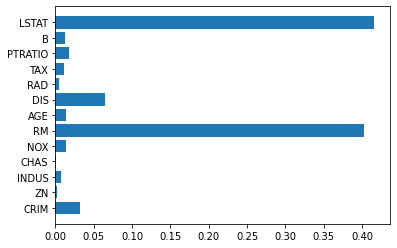

In [175]:
import matplotlib.pyplot as plt 
%matplotlib inline
%config inlineBackend.figure_format ='svg'
plt.barh(x_train.columns, model.feature_importances_)


Сумма показателей важности.

In [176]:
model.feature_importances_.sum()

1.0